# Tutorial 3: K-means and TSNE

## References
1. https://gist.github.com/joemilbourn/3970150

## Topics Covered
1. K-Means: Basics, Image processing examples
2. TSNE: Data visualization

## K-Means
Given a set of observations $(x_1, x_2, …, x_n)$, where each observation is a $d$-dimensional real vector, k-means clustering aims to partition the n observations into $k$ sets $(k ≤ n)$, $S = {S_1, S_2, …, S_k}\;$ so as to minimize the within-cluster sum of squares (WCSS):
$$\text{arg min} \; \sum_{i=1}^{k} \; \sum_{x_j \in S_i} \; \left| x_j -  \mu_i\right|$$
where $\mu_i$ is the mean of points in $S_i$.

This notebook shows a simple example using k-means clustering to determine the centre of point clouds in a 2D space.

### Setup Libraries and Variables

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc, animation
from IPython.display import HTML
rc('animation', html='html5')
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
sns.set_style('white')
import pandas as pd
%matplotlib inline

random_state = 1729

### Toy datasets

#### Blob data

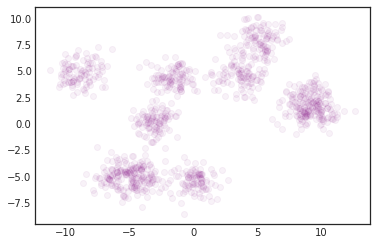

In [2]:
from sklearn.datasets import make_blobs

n_samples = 1000
n_centers = 10
X, Y = make_blobs(n_samples=n_samples, centers=n_centers, 
                  random_state=random_state)

plt.scatter(X[:, 0], X[:, 1], color='purple', label='points', alpha='0.05')

**STEP 1: Random initialize cluster centers**

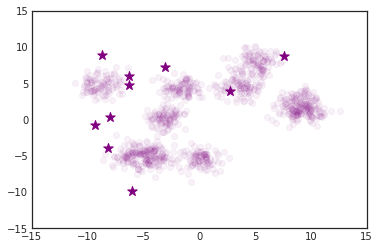

In [4]:
fig, ax = plt.subplots()
ax.axis([-15, 15, -15, 15])
ax.scatter(X[:, 0], X[:, 1], color='purple', label='points', alpha='0.05')
init_data = -10 + 20*np.random.rand(n_centers, 2)
scatr = ax.scatter(init_data[:, 0], init_data[:, 1], 
                   marker="*", s=100, color='purple', animated=True)

**STEP 2: Update cluster centers**

**DIY**
1. Run code yourself (CTL + Enter) to see the animation.

In [5]:
def init():
    return scatr,

def animate(i):
    if i == 0:
        scatr.set_offsets(init_data)
        scatr.set_color('black')
    else:
        kmns = KMeans(n_clusters=n_centers, random_state=random_state, 
                      max_iter=i)
        kmns.fit(X)
        scatr.set_offsets(kmns.cluster_centers_)
        scatr.set_color('blue')
    return scatr,
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=5, 
                               interval=1000, blit=True)

HTML(anim.to_html5_video())

**Ploting clusters and its centroid**

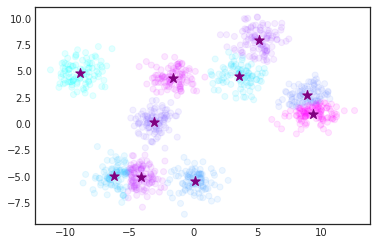

In [6]:
kmns = KMeans(n_clusters=n_centers, random_state=random_state)
kmns.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmns.labels_, cmap=plt.cm.cool, alpha=0.1)
plt.scatter(kmns.cluster_centers_[:, 0], kmns.cluster_centers_[:, 1], 
            marker='*', s=100, color='purple')

#### Half moon dataset

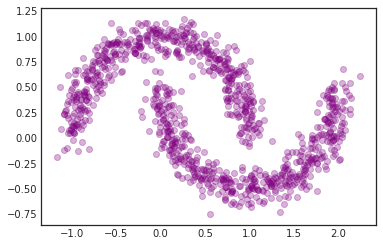

In [7]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=n_samples, noise=0.1, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1], color='purple', alpha='0.3')

**DO IT YOURSELF (3 minutes)**
1. Perform the K-Means clustering on above data-set with 2 cluster.
2. Plot clusters (different color) and their centers.
3. Explain your observations?

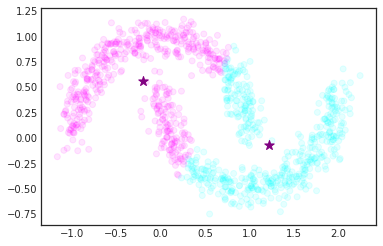

In [8]:
# Use X data for clustering
kmns = KMeans(n_clusters=2, random_state=random_state)
kmns.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmns.labels_, cmap=plt.cm.cool, alpha=0.1)
plt.scatter(kmns.cluster_centers_[:, 0], kmns.cluster_centers_[:, 1], 
            marker='*', s=100, color='purple')

**Observations**

It is not density based clustering

### Determine number of clusters to use?

Use **Elbow method**.

Reference: https://bl.ocks.org/rpgove/0060ff3b656618e9136b

One method to validate the number of clusters is the elbow method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE).

**DO IT YOURSELF (10 minutes)**

Look at: https://gist.github.com/calippo/20a147e657ee5e8d8666

1. Develop **Elbow Method** for blob data-set.
2. Plot *Sum of Squared Errors* vs *Number of Clusters*

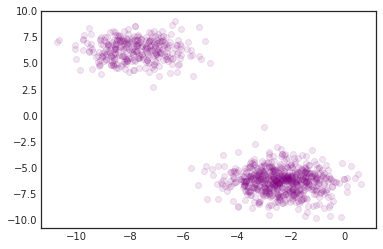

In [70]:
X, Y = make_blobs(n_samples=n_samples, centers=3)
plt.scatter(X[:, 0], X[:, 1], color='purple', alpha='0.1')

In [71]:
def elbow(n_clusters):
    # WRITE YOUR CODE HERE
    pass

vals = [elbow(j) for j in range(1, 5)]

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(vals, '-*')

### Color Quantization using K-Means

Reference: http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

/home/s6kalra/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(-0.5, 511.5, 383.5, -0.5)

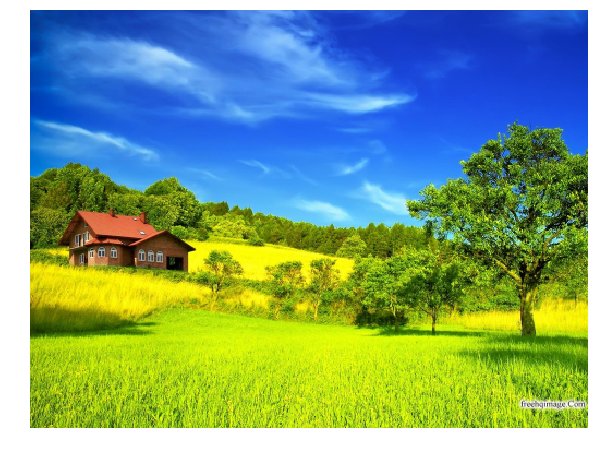

In [80]:
from skimage.io import imread
from skimage.transform import rescale

img = rescale(imread('./images/natural-scene.jpg'), 0.5)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')

In [74]:
img.shape

(384, 512, 3)

In [75]:
cvecs = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
pd.DataFrame(cvecs).head(10)

,0,1,2
0,0.041176,0.264706,0.605882
1,0.042157,0.281373,0.616667
2,0.028431,0.286275,0.621569
3,0.018627,0.291176,0.624510
4,0.014706,0.291176,0.625490
5,0.009804,0.278431,0.617647
6,0.009804,0.270588,0.611765
7,0.015686,0.266667,0.615686
8,0.028431,0.255882,0.606863
9,0.028431,0.251961,0.604902


**DO IT YOURSELF**

1. Perform clustering on all the above pixel values using variable number of clusters.
2. Each cluster center represents a RGB color.
3. Visualize all the cluster centers as colors and stop when you feel all dominant colors have been obtained.
4. Function `visualize_centroids` is provided to you for convienience. 
5. Fill in `perform_kmeans_and_visualize`

In [81]:
import matplotlib.patches as patches
def visualize_centroids(centroids):
    fig, (ax1, ax) = plt.subplots(2, 1)
    ax1.imshow(img)
    ax1.axis('off')
    ax.axis('off')
    ax.axis([0, 0.2*len(centroids)+0.2, 0.0, 0.8])
    for i, cen in enumerate(centroids):
        p = patches.Rectangle((0.1+(i*0.2), 0.1), 0.2, 0.6,
                             facecolor=cen)
        ax.add_patch(p)

def perform_kmeans_and_visualize(n_clusters):
    kmns = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmns.fit(cvecs)
    plt.figure(figsize=(10, 10))
    visualize_centroids(kmns.cluster_centers_)

**DO IT YOURSELF**

1. Use `perform_kmeans_and_visualize` for various `n_clusters`.
2. Find appropriate number of `n_cluster` required to find all dominant colors.
3. What your observations? Are all distinct colors identified? How could you resolve the issue?

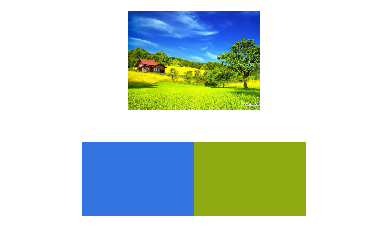

In [82]:
perform_kmeans_and_visualize(2)

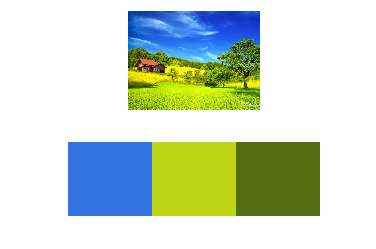

In [83]:
perform_kmeans_and_visualize(3)

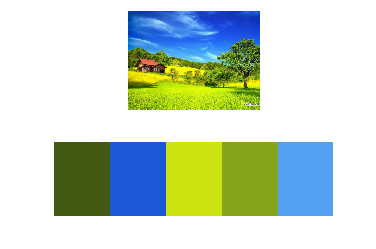

In [84]:
perform_kmeans_and_visualize(5)

**Observations**

Cannot see red

**Possible solution(s)**

Do block wise clustering and then clustering again!

#### Reconstructing image with quantized colors

Reconstructing image with only 6 colors.

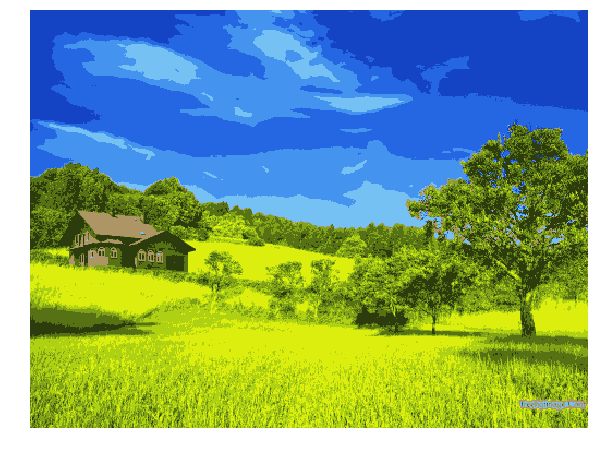

In [87]:
def reconstruct_image(n_colors=2):
    kmns = KMeans(n_clusters=n_colors, random_state=random_state)
    kmns.fit(cvecs)
    plt.imshow(kmns.cluster_centers_[kmns.labels_].reshape(img.shape))
    plt.axis('off')

plt.figure(figsize=(10, 10))
reconstruct_image(10)

### Image Segmentation

Now we have quantized the colors, we can use pixel location information to identify cluster of objects as well.

In [88]:
kmns.labels_

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0,

**STEP 1: Creating feature vector**

Create features using quantized color and location information. 

Each dimention is normalize between [0, 1].

In [89]:
kmns = KMeans(n_clusters=3, random_state=random_state)
kmns.fit(cvecs)
clen = 2+len(kmns.cluster_centers_)
feat = np.zeros((img.shape[0], img.shape[1], clen))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        feat[i, j, 0] = 1.2*i/(img.shape[0]-1.)
        feat[i, j, 1] = 1.2*j/(img.shape[1]-1.)
        
rfeat = feat.reshape((img.shape[0]*img.shape[1], clen))
rfeat[:, 2:] = 1.1*kmns.cluster_centers_[kmns.labels_]

pd.DataFrame(rfeat).head(10)

,0,1,2,3,4
0,0.0,0.000000,0.218769,0.502082,0.966479
1,0.0,0.002348,0.218769,0.502082,0.966479
2,0.0,0.004697,0.218769,0.502082,0.966479
3,0.0,0.007045,0.218769,0.502082,0.966479
4,0.0,0.009393,0.218769,0.502082,0.966479
5,0.0,0.011742,0.218769,0.502082,0.966479
6,0.0,0.014090,0.218769,0.502082,0.966479
7,0.0,0.016438,0.218769,0.502082,0.966479
8,0.0,0.018787,0.218769,0.502082,0.966479
9,0.0,0.021135,0.218769,0.502082,0.966479


** STEP 2: Perform clustering**

Perform clustering on above features and show the clustered objects.

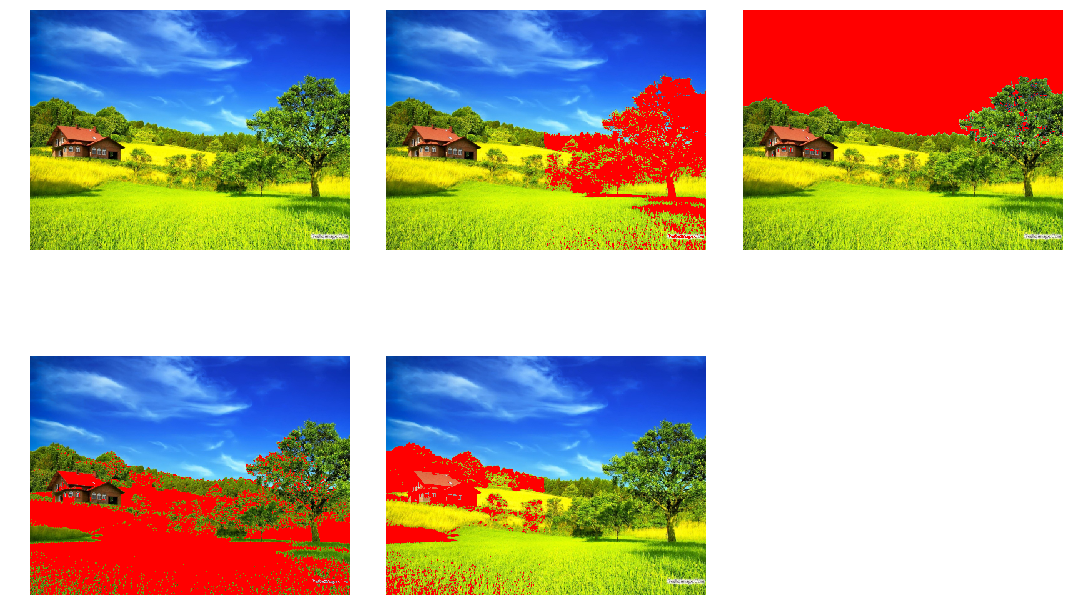

In [93]:
from colorsys import hls_to_rgb
import numpy as np 

# reference:
# https://stackoverflow.com/questions/37299142/
# how-to-set-a-colormap-which-can-give-me-over-20-distinct-colors-in-matplotlib
def get_distinct_colors(n):

    colors = []

    for i in np.arange(0., 360., 360. / n):
        h = i / 360.
        l = (50 + np.random.rand() * 10) / 100.
        s = (90 + np.random.rand() * 10) / 100.
        colors.append(hls_to_rgb(h, l, s))

    return colors

def identify_objects(n_objects):
    col_map = np.array(get_distinct_colors(n_objects))
    kmobjs = KMeans(n_clusters=n_objects, random_state=random_state)
    kmobjs.fit(rfeat)
    fig = plt.figure()
    fig.set_size_inches(15, 10)
    plt.subplot(2, 3, 1)
    plt.imshow(img)
    plt.axis('off')
    
    for i in range(n_objects):
        fimg = np.copy(img.reshape(img.shape[0]*img.shape[1], img.shape[2]))
        plt.subplot(2, 3, 2+i)
        #plt.imshow(col_map[kmobjs.labels_].reshape(img.shape))
        fimg[kmobjs.labels_ == i] = [1.0, 0.0, 0.0]
        plt.imshow(fimg.reshape(img.shape))
        plt.axis('off')
    plt.tight_layout()
    
identify_objects(4)

## TSNE: Visualization Technique

**t-Distributed Stochastic Neighbor Embedding** (t-SNE) is a dimensionality reduction technique well suited for the visualization of high-dimensional datasets.

**Resources**

1. https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
2. https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf

### Nice visualization technique
I like it personally use it to visualize deep features, embedding and etc.

![All Things TSNE](images/tsne.jpg)

### Toy example: IRIS dataset

Reference: http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

The **Iris Dataset** consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

**STEP 1: Load Libraries**

In [309]:
from sklearn import datasets
from sklearn.manifold import TSNE

**STEP 2: Load dataset**

In [313]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

**STEP 2: Visualize using TSNE**

**Remarks:** Play with `learning_rate` parameter to get good visualization.

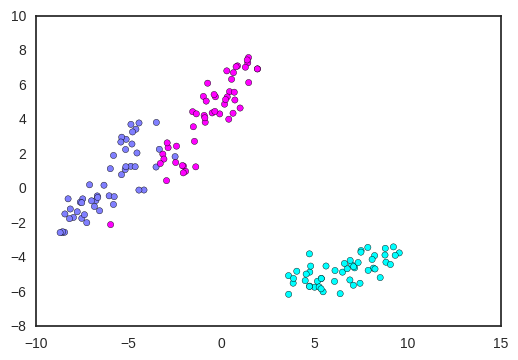

In [316]:
tsne = TSNE(n_components=2, learning_rate=120, 
            random_state=random_state)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap=plt.cm.cool)

## Bag of Words

**STEP 1: Collect the data-set**

In [94]:
from sklearn.datasets import fetch_20newsgroups
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')
categories = ['alt.atheism',
              'comp.graphics',
              'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware',
              'comp.windows.x',
              'misc.forsale',
              'rec.autos',
              'rec.motorcycles',
              'rec.sport.baseball',
              'rec.sport.hockey',
              'sci.crypt',
              'sci.electronics',
              'sci.med',
              'sci.space',
              'soc.religion.christian',
              'talk.politics.guns',
              'talk.politics.mideast',
              'talk.politics.misc',
              'talk.religion.misc']
newsgroups_train = fetch_20newsgroups(categories=categories)

2018-01-25 07:43:27,939 Downloading 20news dataset. This may take a few minutes.
2018-01-25 07:43:27,947 Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


**STEP 1: Tokenize the messages**

Taken from:
https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-2-word-vectors

In [97]:
import re
from nltk.corpus import stopwords
import nltk.data

nltk.download()
def review_to_wordlist( review, remove_stopwords=True ):

    review_text = re.sub("\n", " ", review)
    words = review_text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    words = [re.sub("[^a-zA-Z]","", word) for word in words]
    words = filter(lambda x: x != '', words)
    return(words)

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    return sentences

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [99]:
sentences = []  # Initialize an empty list of sentences

print("Parsing sentences from training set")
for review in newsgroups_train.data:
    sentence = []
    for sen in review_to_sentences(review, tokenizer):
        sentence.extend(sen)
    sentences.append(sentence)

Parsing sentences from training set


In [102]:
# Set values for various parameters
num_features = 100    # Word vector dimensionality
min_word_count = 20   # Minimum word count
num_workers = 4       # Number of threads to run in parallel
context = 10           # Context window size
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2018-01-25 08:27:01,480 'pattern' package not found; tag filters are not available for English
2018-01-25 08:27:01,484 collecting all words and their counts
2018-01-25 08:27:01,485 PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model...


2018-01-25 08:27:02,037 PROGRESS: at sentence #10000, processed 2706362 words, keeping 110335 word types
2018-01-25 08:27:02,113 collected 120249 word types from a corpus of 3036852 raw words and 11314 sentences
2018-01-25 08:27:02,114 Loading a fresh vocabulary
2018-01-25 08:27:02,171 min_count=20 retains 10057 unique words (8% of original 120249, drops 110192)
2018-01-25 08:27:02,173 min_count=20 leaves 2742525 word corpus (90% of original 3036852, drops 294327)
2018-01-25 08:27:02,201 deleting the raw counts dictionary of 120249 items
2018-01-25 08:27:02,205 sample=0.001 downsamples 50 most-common words
2018-01-25 08:27:02,206 downsampling leaves estimated 2120434 word corpus (77.3% of prior 2742525)
2018-01-25 08:27:02,207 estimated required memory for 10057 words and 100 dimensions: 13074100 bytes
2018-01-25 08:27:02,239 resetting layer weights
2018-01-25 08:27:02,351 training model with 4 workers on 10057 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window

In [103]:
model.most_similar("man")

/home/s6kalra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('himself', 0.7973929643630981),
 ('woman', 0.7937827706336975),
 ('christ', 0.7698956727981567),
 ('son', 0.7582265138626099),
 ('father', 0.7413202524185181),
 ('prophet', 0.7282792329788208),
 ('jesus', 0.7261224985122681),
 ('lord', 0.7240680456161499),
 ('heaven', 0.7213664650917053),
 ('satan', 0.7127074003219604)]

In [104]:
from sklearn.cluster import KMeans
tgkmns = KMeans(n_clusters=100, verbose=1)

tgkmns.fit(model.wv.syn0)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4693.45
start iteration
done sorting
end inner loop
Iteration 1, inertia 4489.72
start iteration
done sorting
end inner loop
Iteration 2, inertia 4432.11
start iteration
done sorting
end inner loop
Iteration 3, inertia 4405.09
start iteration
done sorting
end inner loop
Iteration 4, inertia 4388.56
start iteration
done sorting
end inner loop
Iteration 5, inertia 4377.3
start iteration
done sorting
end inner loop
Iteration 6, inertia 4368.86
start iteration
done sorting
end inner loop
Iteration 7, inertia 4362.72
start iteration
done sorting
end inner loop
Iteration 8, inertia 4357.86
start iteration
done sorting
end inner loop
Iteration 9, inertia 4353.71
start iteration
done sorting
end inner loop
Iteration 10, inertia 4350.49
start iteration
done sorting
end inner loop
Iteration 11, inertia 4347.36
start iteration
done sorting
end inner loop
Iteration 12, inertia 4345.14
start iteration
done sort

Iteration 45, inertia 4344.39
start iteration
done sorting
end inner loop
Iteration 46, inertia 4344.32
start iteration
done sorting
end inner loop
Iteration 47, inertia 4344.29
start iteration
done sorting
end inner loop
Iteration 48, inertia 4344.28
start iteration
done sorting
end inner loop
Iteration 49, inertia 4344.27
start iteration
done sorting
end inner loop
Iteration 50, inertia 4344.27
center shift 0.000000e+00 within tolerance 8.152956e-07
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4693.84
start iteration
done sorting
end inner loop
Iteration 1, inertia 4483.47
start iteration
done sorting
end inner loop
Iteration 2, inertia 4433.95
start iteration
done sorting
end inner loop
Iteration 3, inertia 4410.84
start iteration
done sorting
end inner loop
Iteration 4, inertia 4397.27
start iteration
done sorting
end inner loop
Iteration 5, inertia 4388.5
start iteration
done sorting
end inner loop
Iteration 6, inertia 4379.87
start iter

done sorting
end inner loop
Iteration 23, inertia 4346.96
start iteration
done sorting
end inner loop
Iteration 24, inertia 4346.69
start iteration
done sorting
end inner loop
Iteration 25, inertia 4346.45
start iteration
done sorting
end inner loop
Iteration 26, inertia 4346.3
start iteration
done sorting
end inner loop
Iteration 27, inertia 4346.13
start iteration
done sorting
end inner loop
Iteration 28, inertia 4345.9
start iteration
done sorting
end inner loop
Iteration 29, inertia 4345.74
start iteration
done sorting
end inner loop
Iteration 30, inertia 4345.65
start iteration
done sorting
end inner loop
Iteration 31, inertia 4345.61
start iteration
done sorting
end inner loop
Iteration 32, inertia 4345.52
start iteration
done sorting
end inner loop
Iteration 33, inertia 4345.45
start iteration
done sorting
end inner loop
Iteration 34, inertia 4345.42
start iteration
done sorting
end inner loop
Iteration 35, inertia 4345.34
start iteration
done sorting
end inner loop
Iteration 36

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4712.59
start iteration
done sorting
end inner loop
Iteration 1, inertia 4500.85
start iteration
done sorting
end inner loop
Iteration 2, inertia 4444.39
start iteration
done sorting
end inner loop
Iteration 3, inertia 4416.7
start iteration
done sorting
end inner loop
Iteration 4, inertia 4399.1
start iteration
done sorting
end inner loop
Iteration 5, inertia 4387.07
start iteration
done sorting
end inner loop
Iteration 6, inertia 4379.5
start iteration
done sorting
end inner loop
Iteration 7, inertia 4373.83
start iteration
done sorting
end inner loop
Iteration 8, inertia 4369.57
start iteration
done sorting
end inner loop
Iteration 9, inertia 4365.88
start iteration
done sorting
end inner loop
Iteration 10, inertia 4362.46
start iteration
done sorting
end inner loop
Iteration 11, inertia 4359.23
start iteration
done sorting
end inner loop
Iteration 12, inertia 4356.82
start iteration
done sortin

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [105]:
import pandas as pd
import numpy as np
df = pd.DataFrame(list(enumerate(tgkmns.labels_)))
df.columns = ['idx', 'labels']

grouped = df.groupby('labels')
groups = []
for name, group in grouped:
    groups.append(np.array(model.wv.index2word)[list(group.idx)])

In [107]:
groups[2]

array(['bmw', 'double', 'riding', 'motorcycle', 'honda', 'owner', 'ford',
       'gold', 'movie', 'sc', 'pack', 'classic', 'amazing', 'gt', 'toyota',
       'soft', 'rf', 'hat', 'leather', 'garage', 'buck', 'cm', 'flash',
       'wagon', 'dodge', 'ugly', 'fake', 'runner', 'cbc', 'convertible',
       'nissan', 'pickup', 'harley', 'vw', 'coffee', 'starter', 'taurus',
       'continental', 'accord', 'hawk', 'rpm', 'helmets', 'tea', 'tune',
       'alarm', 'mazda', 'civic', 'porsche', 'hood', 'ta', 'volvo', 'fork',
       'rack', 'racing', 'jeep', 'ratings', 'cents', 'gloves', 'thunder',
       'liter', 'mint', 'mrs', 'shifting', 'colt', 'bmws', 'rash',
       'boring', 'dealership', 'subaru', 'lawn', 'awd', 'tbird', 'ton',
       'cruiser', 'dock', 'sedan', 'interstate', 'bags', 'kawasaki',
       'interestingly', 'thick', 'trim', 'shoei', 'scratches', 'forecast',
       'unhappy', 'wierd', 'cam', 'carb', 'gsr', 'sentra', 'eagle',
       'fairing', 'oz', 'diesel', 'sheesh', 'fever', 'cam

In [108]:
import sklearn.preprocessing as pre

feats = []
good_sentence_idx = []
for idx, sentence in enumerate(sentences):
    vect = []
    for word in sentence:
        if word in model:
            vect.append(model[word])
    if len(vect) != 0:
        good_sentence_idx.append(idx)
        feat = pre.minmax_scale(np.sum(tgkmns.transform(np.array(vect)), 
                                       axis=0))
        feats.append(feat)

/home/s6kalra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/home/s6kalra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [109]:
from sklearn.svm import SVC

tgsvc = SVC(verbose=1)
tgsvc.fit(feats, newsgroups_train.target[good_sentence_idx])

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1)

In [116]:
test_text = "Deep Blue won its first game against a world champion on February 10, 1996,  when it defeated Garry Kasparov in game one of a six-game match. However, Kasparov won three and drew two of the following five games, defeating Deep Blue by a score of 4-2. Deep Blue was then heavily upgraded, and played Kasparov again in May 1997. Deep Blue won game six, therefore winning the six-game rematch and becoming the first computer system to defeat a reigning world champion in a match under standard chess tournament time controls.[1] Kasparov accused IBM of cheating and demanded a rematch. IBM refused and retired Deep Blue."
test_text = 'Bose have the best headphones in world. They are better than sony.'

In [117]:
sentence = []
for sen in review_to_sentences(test_text, tokenizer):
    sentence.extend(sen)

vecs = []
for word in sentence:
    if word in model:
        vecs.append(model[word])

vec = pre.minmax_scale(np.sum(tgkmns.transform(np.array(vecs)), axis=0))

/home/s6kalra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/home/s6kalra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [118]:
tgsvc.predict(vec.reshape(1, -1))
newsgroups_train.target_names[tgsvc.predict(vec.reshape(1, -1))[0]]

'rec.autos'